# **Mini Project 1**

In [165]:
#@InProceedings{maas-EtAl:2011:ACL-HLT2011,
#  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
#  title     = {Learning Word Vectors for Sentiment Analysis},
#  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},
#  month     = {June},
#  year      = {2011},
#  address   = {Portland, Oregon, USA},
#  publisher = {Association for Computational Linguistics},
#  pages     = {142--150},
#  url       = {http://www.aclweb.org/anthology/P11-1015}
#}

#References

#Potts, Christopher. 2011. On the negativity of negation. In Nan Li and
#David Lutz, eds., Proceedings of Semantics and Linguistic Theory 20,
#636-659.

0. Requirements:
   
   If you do not have the following packages installed, run the command below to install them.

In [167]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install codecarbon
!pip install shap

1. Data Preparation:
   
    Goal: Load and inspect the IMDb dataset containing movie reviews labeled with positive and negative sentiments.(https://ai.stanford.edu/%7Eamaas/data/sentiment/)
    
    Task: Read the dataset, store the reviews and their associated sentiments, and explore the dataset to understand its structure.

In [169]:
import os
import pandas as pd
import numpy as np
import re
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from codecarbon import EmissionsTracker




In [170]:
# TASK 1: Data Preparation 
import glob
import time

start = time.time()

def load_imdb_data(directory):
    texts = []
    labels = []

    for label, sentiment in enumerate(["neg", "pos"]):  
        files = glob.glob(os.path.join(directory, sentiment, "*.txt")) 
        for file_path in files:
            with open(file_path, "r", encoding="latin-1") as f:
                texts.append(f.read())  
                labels.append(label)

    return pd.DataFrame({"review": texts, "label": labels})
#This function creates two lists, texts and labels and goes through the whole file filling out these list with it's respected data
# It returns a dataframe with all the reviews and all the sentiments, 0 for negative and 1 for positive

# Load training data
train_df = load_imdb_data("aclImdb/train")
test_df = load_imdb_data("aclImdb/test")
print("Time:", time.time() - start)



Time: 585.753256559372


In [171]:
print(train_df.tail())

                                                  review  label
24995  Seeing as the vote average was pretty low, and...      1
24996  The plot had some wretched, unbelievable twist...      1
24997  I am amazed at how this movie(and most others ...      1
24998  A Christmas Together actually came before my t...      1
24999  Working-class romantic drama from director Mar...      1


In [172]:
print(test_df.head())

                                              review  label
0  Once again Mr. Costner has dragged out a movie...      0
1  This is an example of why the majority of acti...      0
2  First of all I hate those moronic rappers, who...      0
3  Not even the Beatles could write songs everyon...      0
4  Brass pictures (movies is not a fitting word f...      0


In [173]:
print(test_df.tail())

                                                  review  label
24995  I was extraordinarily impressed by this film. ...      1
24996  Although I'm not a golf fan, I attended a snea...      1
24997  From the start of "The Edge Of Love", the view...      1
24998  This movie, with all its complexity and subtle...      1
24999  I've seen this story before but my kids haven'...      1


2. Text Preprocessing:
   
    Goal: Clean and preprocess the text data to remove noise and prepare it for analysis.
    
    Task: Remove unnecessary characters (e.g., HTML tags, punctuation), convert text to lowercase, and process words by removing stop words and stemming/lemmatizing them.

In [175]:
# TASK 2: Text Preprocessing 

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    return text.lower()  # Convert to lowercase
# THis function removes HTML tags, special characters and converts to lowercase

train_df['review'] = train_df['review'].apply(clean_text)
test_df['review'] = test_df['review'].apply(clean_text)

 

3. Feature Extraction:

    Goal: Transform the cleaned text into numerical features for machine learning.
   
    Task: Use a vectorization technique such as TF-IDF to convert the text into a numerical matrix that captures the importance of each word in the dataset.

In [177]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [178]:
# TASK 3: Feature Extraction

#Initialize TF-IDF vectorizer, don't use stopwords
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

# Transform text into TF-IDF features
X_train = tfidf_vectorizer.fit_transform(train_df['review'])
X_test = tfidf_vectorizer.transform(test_df['review'])

# Target values
y_train = train_df['label'].values
y_test = test_df['label'].values

# Print shapes of feature matrices
print("TF-IDF Feature Shape (Train):", X_train.shape)
print("TF-IDF Feature Shape (Test):", X_test.shape)

TF-IDF Feature Shape (Train): (25000, 141826)
TF-IDF Feature Shape (Test): (25000, 141826)


4. Model Training:

    Goal: Train a machine learning model to classify reviews based on their sentiment.
    
    Task: Split the dataset into training and testing sets, train a Logistic Regression model, and evaluate its performance on the test data.

In [180]:
# TASK 4: Model Training 
tracker = EmissionsTracker()

tracker.start()

model = LogisticRegression()
model.fit(X_train, y_train)

emissions = tracker.stop()  # Stop tracking emissions

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# TASK 8: Track emissions during model training

print(f"Emissions: {emissions:.10f} kgCO2")


[codecarbon INFO @ 00:14:10] [setup] RAM Tracking...
[codecarbon INFO @ 00:14:10] [setup] CPU Tracking...
[codecarbon WARNING @ 00:14:10] No CPU tracking mode found. Falling back on CPU constant mode. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon WARNING @ 00:14:12] We saw that you have a 12th Gen Intel(R) Core(TM) i7-1260P but we don't know it. Please contact us.
[codecarbon INFO @ 00:14:12] CPU Model on constant consumption mode: 12th Gen Intel(R) Core(TM) i7-1260P
[codecarbon INFO @ 00:14:12] [setup] GPU Tracking...
[codecarbon INFO @ 00:14:12] No GPU found.
[codecarbon INFO @ 00:14:12] >>> Tracker's metadata:
[codecarbon INFO @ 00:14:12]   Platform system: Windows-11-10.0.22631-SP0
[codecarbon INFO @ 00:14:12]   Python version: 3.12.7
[codecarbon INFO @ 00:14:12]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 00:14:12]   Available RAM : 7.731 GB
[codecarbon INFO @ 00:14:12]   CPU count: 16
[codecarbon INFO @ 00:14:12]   CPU model: 12th Gen Int

Accuracy: 0.88276
Emissions: 0.0000000556 kgCO2


5. Model Evaluation:

    Goal: Assess the performance of your model using appropriate metrics.
    
    Task: Evaluate precision, recall, and F1-score of the Logistic Regression model. Use these metrics to identify the strengths and weaknesses of your system. Visualize the Confusion Matrix to better understand how well the model classifies positive and negative reviews. Additionally, test the model with a new review, preprocess it, make a prediction, and display the result. Example: test it with a new review such as:
    "The movie had great visuals, but the storyline was dull and predictable." The expected output might be: Negative Sentiment.

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



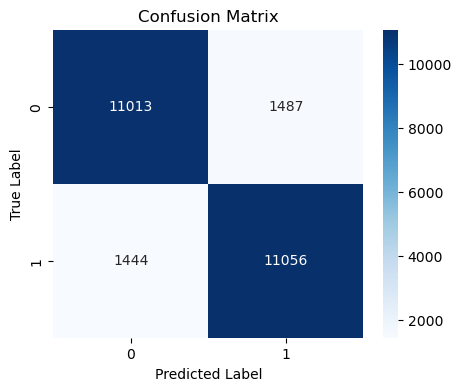

Predicted sentiment: Negative


In [182]:
# TASK 5: Model Evaluation 
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
confus_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confus_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Test with a new review
review = "The movie had great visuals but the storyline was dull and predictable."
review_clean = clean_text(review)
review_vec = tfidf_vectorizer.transform([review_clean])
pred = model.predict(review_vec)[0]
print("Predicted sentiment:", "Positive" if pred == 1 else "Negative")

6. Hyperparameter Tuning:

    Goal: Optimize your Logistic Regression model by tuning its hyperparameters.
   
    Task: Use an optimization method to find the best parameters for your model and improve its accuracy.

In [184]:
# TASK 6: Hyperparameter Tuning 

# Hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

tracker.start()

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

emissions = tracker.stop()  # Stop tracking emissions

model_best = grid_search.best_estimator_


y_pred_test = model_best.predict(X_test)

print("Classification Report on the Test Set:")
print(classification_report(y_test, y_pred_test))

print("Best hyperparameters:", grid_search.best_params_["C"])
print("Best accuracy:", grid_search.best_score_)

print(f"Emissions: {emissions:.10f} kgCO2")

[codecarbon WARNING @ 00:14:15] Already started tracking
[codecarbon WARNING @ 00:14:40] Tracker already stopped !
[codecarbon INFO @ 00:14:40] Energy consumed for RAM : 0.000022 kWh. RAM Power : 2.899106025695801 W
[codecarbon INFO @ 00:14:40] Energy consumed for all CPUs : 0.000324 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:14:40] 0.000346 kWh of electricity used since the beginning.


Classification Report on the Test Set:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Best hyperparameters: 1
Best accuracy: 0.86076
Emissions: 0.0000008227 kgCO2


7. Learning Curve Analysis:

    Goal: Diagnose your model's performance by plotting learning curves.
   
    Task: Analyze training and validation performance as a function of the training set size to identify underfitting or overfitting issues.


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1301, in fit
    raise Valu

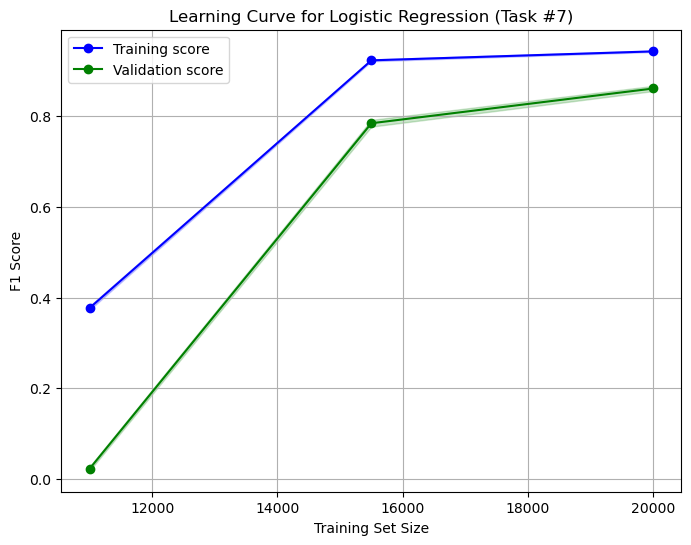

In [186]:
# TASK 7: Learning Curve Analysis

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=model_best,                                  # Best LR model from Task #6
    X=X_train,                                               # TF-IDF features (training set)
    y=y_train,                                               # Training labels
    train_sizes=np.linspace(0.1, 1.0, 5),                    # e.g., 5 points from 10% to 100% of the data
    cv=5,                                                    # 5-fold cross-validation
    scoring='f1',                                            # or 'accuracy', 'precision_macro', etc.
    n_jobs=-1                                                # use all available CPU cores
)

#Compute average and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)
plt.figure(figsize=(8, 6))

# Plot training scores
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2,
    color='blue'
)

# Plot validation scores
plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Validation score')
plt.fill_between(
    train_sizes,
    valid_mean - valid_std,
    valid_mean + valid_std,
    alpha=0.2,
    color='green'
)

plt.title("Learning Curve for Logistic Regression (Task #7)")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()



9. Ethical Considerations and Explainability:

    Goal: Discuss the ethics in using and deploying your AI-based solution by investigating and implementing suitable explainability methods.
    
    Task: Understanding how a machine learning model makes predictions is crucial for ensuring transparency, fairness, and accountability in AI deployment. One of the widely used techniques for model explainability is SHAP (SHapley Additive exPlanations), which helps determine how much each feature (word) contributes to a prediction.
    In this task, you will use SHAP to analyze the impact of individual words on sentiment classification. This will allow you to visualize which words increase or decrease the probability of a positive or negative sentiment prediction. Additionally, discuss key aspects such as potential biases in the model, fairness in outcomes, and accountability in AI decision-making. You can find more information here: https://shap.readthedocs.io/en/latest/generated/shap.Explanation.html

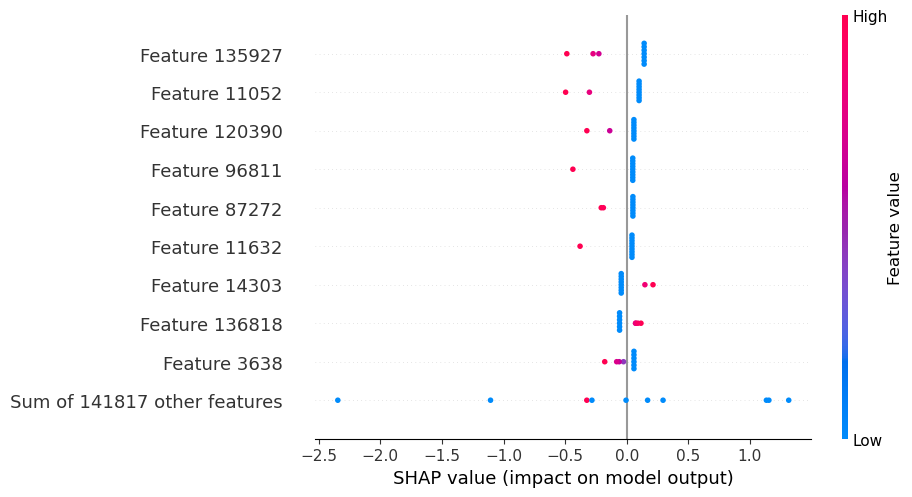

In [188]:
# TASK 9: Ethical Considerations & Explainability

sample_size = 10
X_test_sample = X_test[:sample_size]
y_test_sample = y_test[:sample_size]

# Create a SHAP explainer
explainer = shap.Explainer(model, X_test_sample)

# Generate SHAP values
shap_values = explainer(X_test_sample)

# SHAP Summary Plot
shap.plots.beeswarm(shap_values)


10. Deployment Considerations for Embedded Systems:

    Goal: Optimize and convert the trained logistic regression model for deployment on embedded systems like Arduino
    
    Task: To deploy the trained logistic regression model on a resource-constrained embedded system like an Arduino, we must optimize and convert the model into a format suitable for execution in an environment with limited memory and processing power. Since embedded systems do not support direct execution of machine learning models trained in Python, we extract the model’s learned parameters—namely, the weights and bias—after training. These parameters are then quantized to fixed-point integers to eliminate the need for floating-point calculations, which are inefficient on microcontrollers.
    Once quantization is applied, we generate a C++ .h header file containing the model’s coefficients and bias, formatted in a way that allows direct use within an Arduino sketch. The final model is optimized to perform inference using integer arithmetic, making it both lightweight and efficient for deployment on microcontrollers. You can find more information here: https://medium.com/@thommaskevin/tinyml-binomial-logistic-regression-0fdbf00e6765

In [190]:
# TASK 10: Deployment Considerations (Model Quantization & Export for Arduino)

# Extract weights and bias 
weights = model_best.coef_[0] 
bias = model_best.intercept_[0]

# Apply quantization 
max_weight = np.max(np.abs(weights))
scale_factor = 127.0 / max_weight if max_weight != 0 else 1.0
int_weights = (weights * scale_factor).astype(np.int8)
int_bias = int(bias * scale_factor)

# Generate C++ header file for Arduino
n_features = len(int_weights)

header_content = (
    "#ifndef LOGREG_MODEL_H\n"
    "#define LOGREG_MODEL_H\n\n"
    f"static const int8_t LOGREG_WEIGHTS[{n_features}] = {{"
    + ",".join(map(str, int_weights))
    + "};\n\n"
    f"static const int LOGREG_BIAS = {int_bias};\n\n"
    f"static const float LOGREG_SCALE_FACTOR = {scale_factor}f;\n\n"
    "#endif // LOGREG_MODEL_H\n"
)

# Save the header file
header_filename = "logreg_model.h"
with open(header_filename, 'w') as f:
    f.write(header_content)

print(f"Header file '{header_filename}' created successfully!")

Header file 'logreg_model.h' created successfully!
